#### Importing the basic necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

#### Importing the dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\LENOVO\Documents\Post Graduation\data sets\dataset1-master\abalone.csv')
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
dataset.shape

(4177, 9)

#### The dataset contains 4177 rows and 9 columns including the target variable

In [4]:
dataset.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

#### There are no missing values present in the dataset

In [5]:
le  = LabelEncoder()
enc_data = le.fit_transform(dataset['Sex'])
pd.Series(enc_data)
dataset['Sex'] = enc_data

#### Tha feature 'Sex' is a categorical variable, therefore, I'm using a label encoder to convert it to numerical

In [6]:
dataset.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### Below are the observations for te float type variables
#### Length : mean=0.523992,  std=0.120093, min: 0.075000, max: 0.815000
#### Diameter : mean=0.407881,  std=0.099240, min: 0.055000, max: 0.650000
#### Height : mean=0.139516,  std=0.041827, min: 0.000000, max: 1.130000
#### Whole weight : mean=0.828742,  std=0.490389, min: 0.002000, max: 2.825500
#### Shucked weight : mean=0.359367,  std=0.221963, min: 0.001000, max: 1.488000
#### Viscera weight : mean=0.180594,  std=0.109614, min: 0.000500, max: 0.760000
#### Shell weight : mean=0.238831,  std=0.139203, min: 0.001500, max: 1.005000

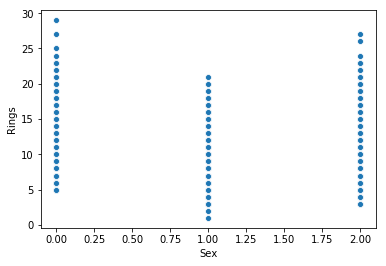

In [7]:
plt1 = sns.scatterplot(x = 'Sex',y = 'Rings', data = dataset)
plt1

#### for male abalnoes the rings start from 5, for female abalones rings start from 0 to 22(approx) and for the gender (I) the rings atart from 4 and ends at 27

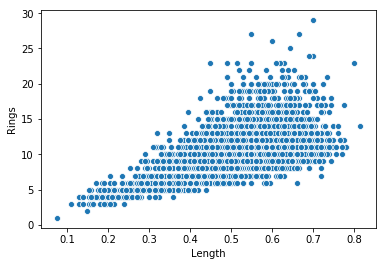

In [8]:
plt2 = sns.scatterplot(x='Length',y = 'Rings', data = dataset)
plt2

#### length shows average positive correlation with target

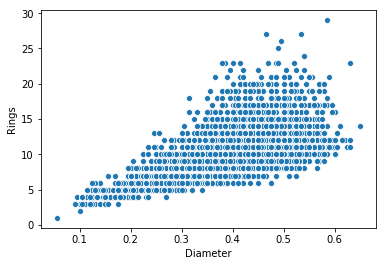

In [9]:
plt3 = sns.scatterplot(x ='Diameter', y ='Rings',data =dataset)
plt3

#### Diameter shows average positive correlation with target

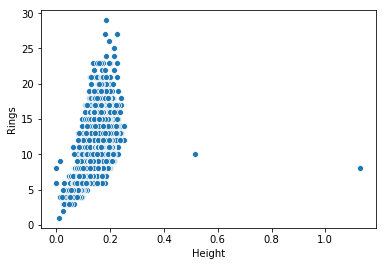

In [10]:
plt4 = sns.scatterplot(x = 'Height', y='Rings', data = dataset)
plt4

#### Height shows very less positive correlation with target

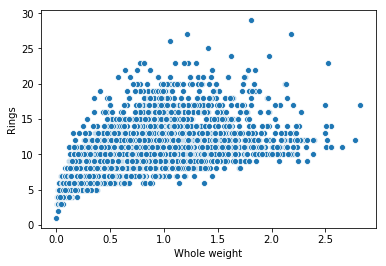

In [11]:
plt5 = sns.scatterplot(x = 'Whole weight', y='Rings', data = dataset)
plt5

#### Whole weight shows average positive correlation with target

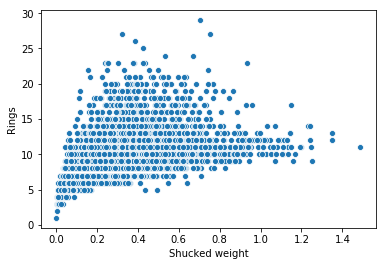

In [12]:
plt6 = sns.scatterplot(x = 'Shucked weight', y='Rings', data = dataset)
plt6  

#### Shucked weight shows average positive correlation with target

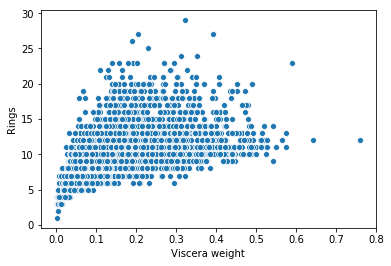

In [13]:
plt7 = sns.scatterplot(x = 'Viscera weight', y='Rings', data = dataset)
plt7

#### Viscera weight shows average positive correlation with target

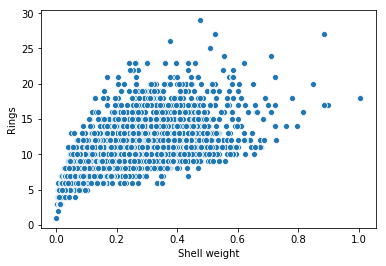

In [14]:
plt8 = sns.scatterplot(x = 'Shell weight', y='Rings', data = dataset)
plt8

#### Shell weight shows average positive correlation with target

In [15]:
cor_num = dataset.corr()
cor_num['Rings'].sort_values(ascending = False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64

#### The correlation coeffcients ranges from -1 to 1 which explains strong negative and strong positive correlation respectively

### Here the highest correlation is contributed by 'Shell Weight' and the least contribution is from 'Sex'

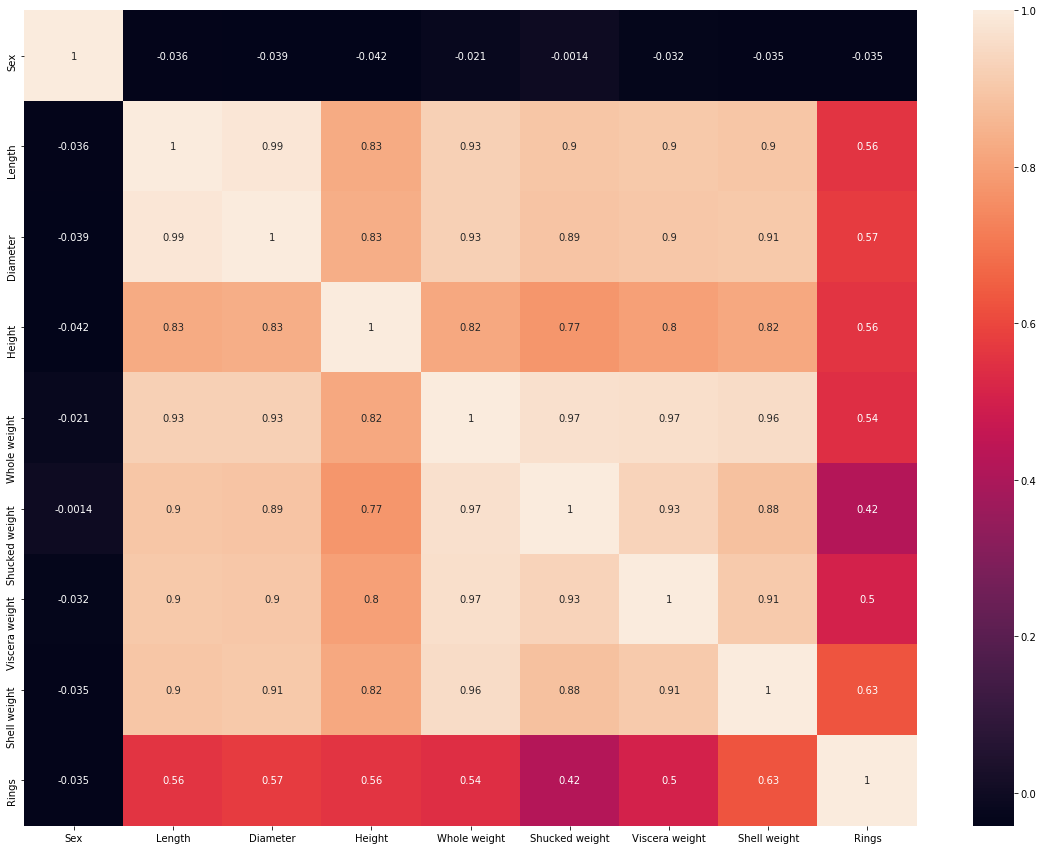

In [16]:
plt.figure(figsize = (20,15))
sns.heatmap(cor_num, annot = True)
plt.title = ('correlation')
plt.show()

### From the above correlation map(heat map), we can clearly see that the independent variables are correlated with each other. However we are not treating it because it doesn't have any effect on model accuracy and we are just predicting the outcome using the given variable

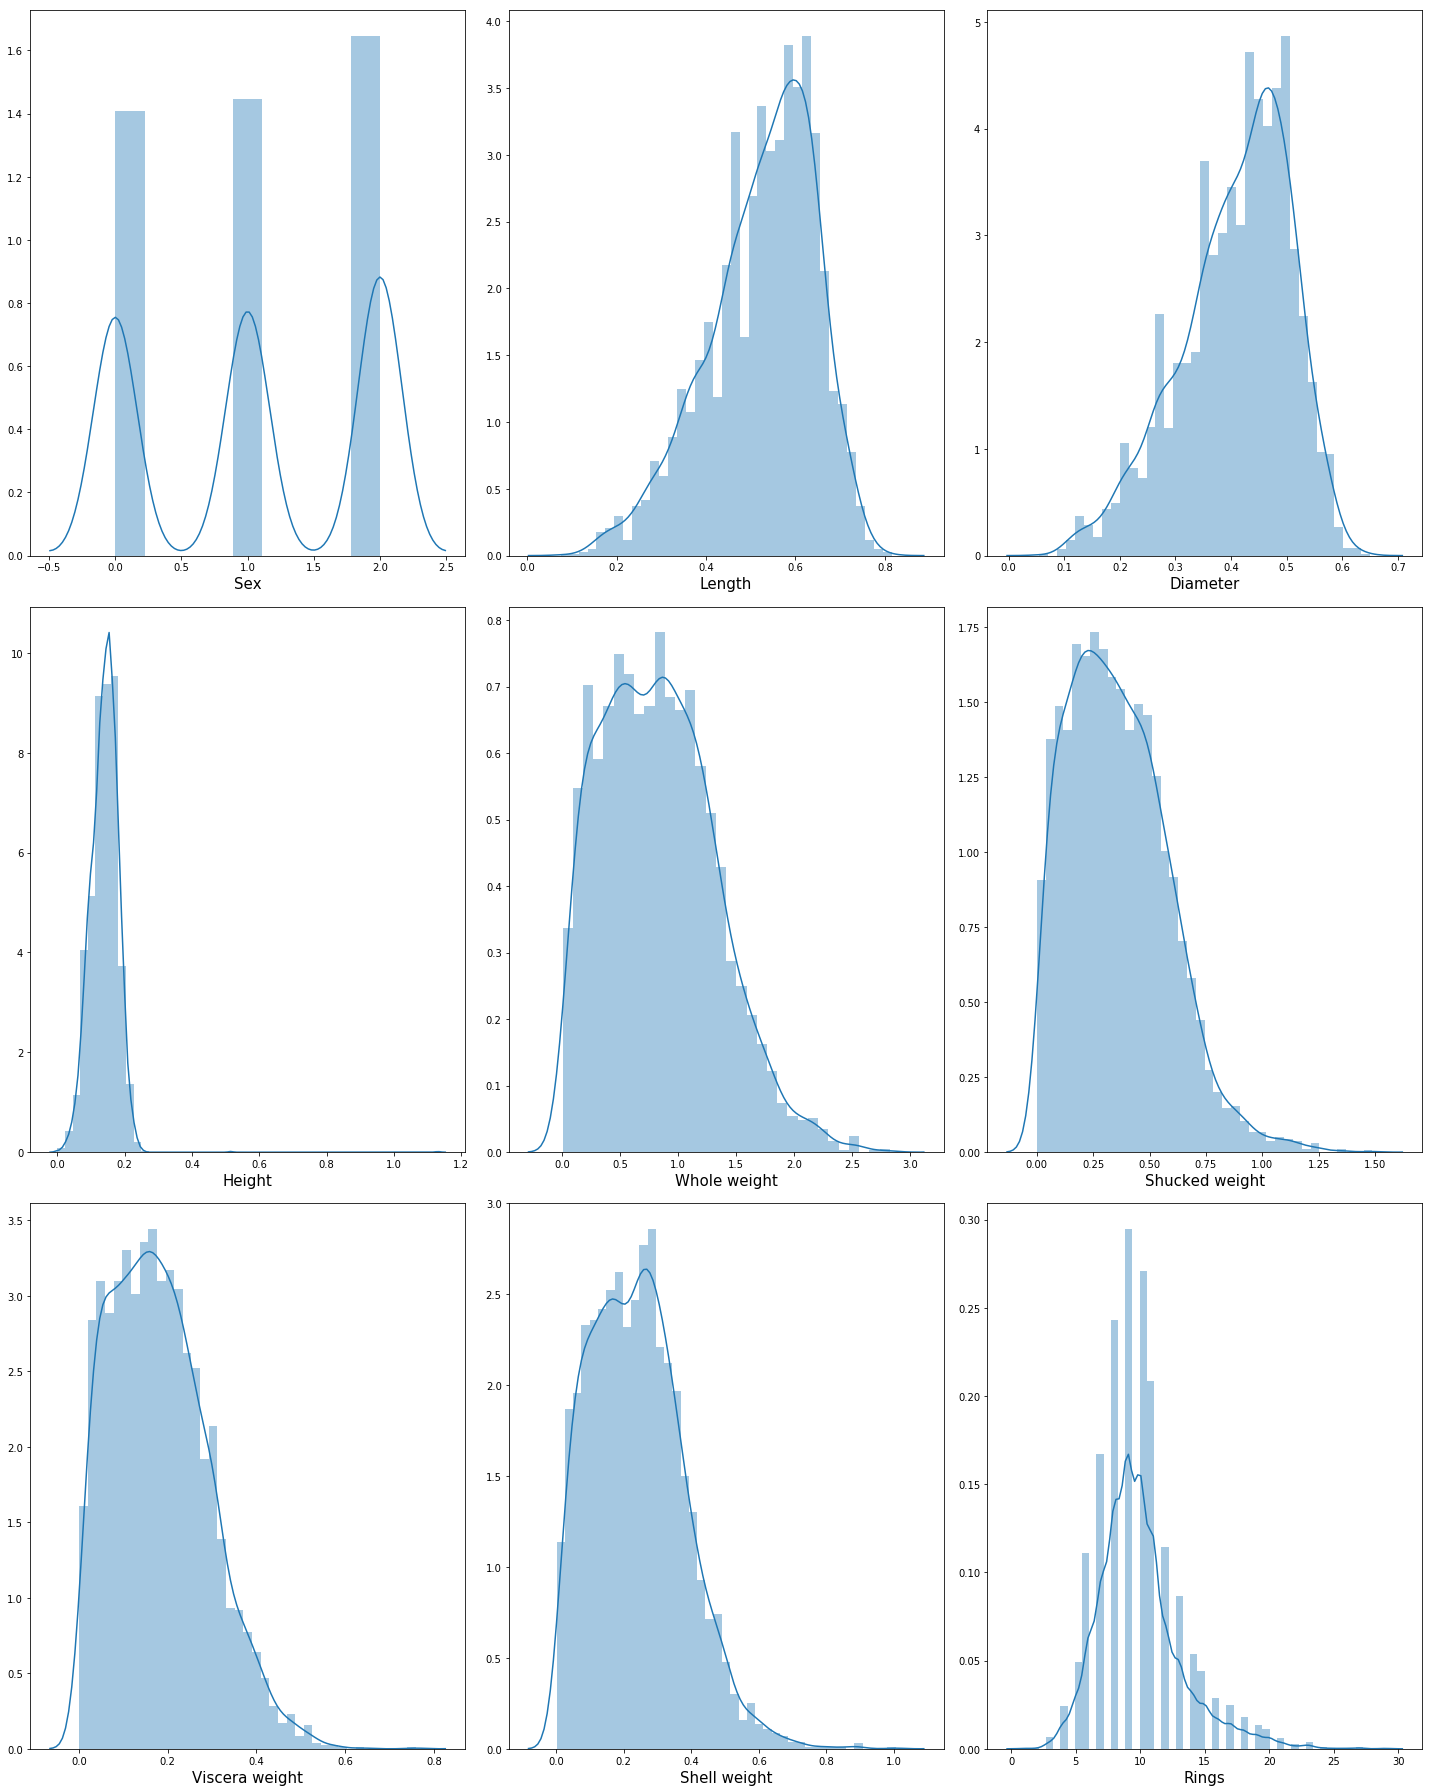

In [17]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for i in dataset:
    if plotnumber <= 9:
        cx = plt.subplot(3,3,plotnumber)
    if dataset[i].dtype =='object':
        sns.countplot(dataset[i])
        plt.title(i)
        plt.xticks(rotation = 45)
    else:
        sns.distplot(dataset[i])
        plt.xlabel(i,fontsize = 15)
    plotnumber+=1
plt.tight_layout()

#### Proceeding with the skewness on the data we see that most of the variables like 'viscera weight','shell weight','shucked weight','whole weight' and more are little skewed

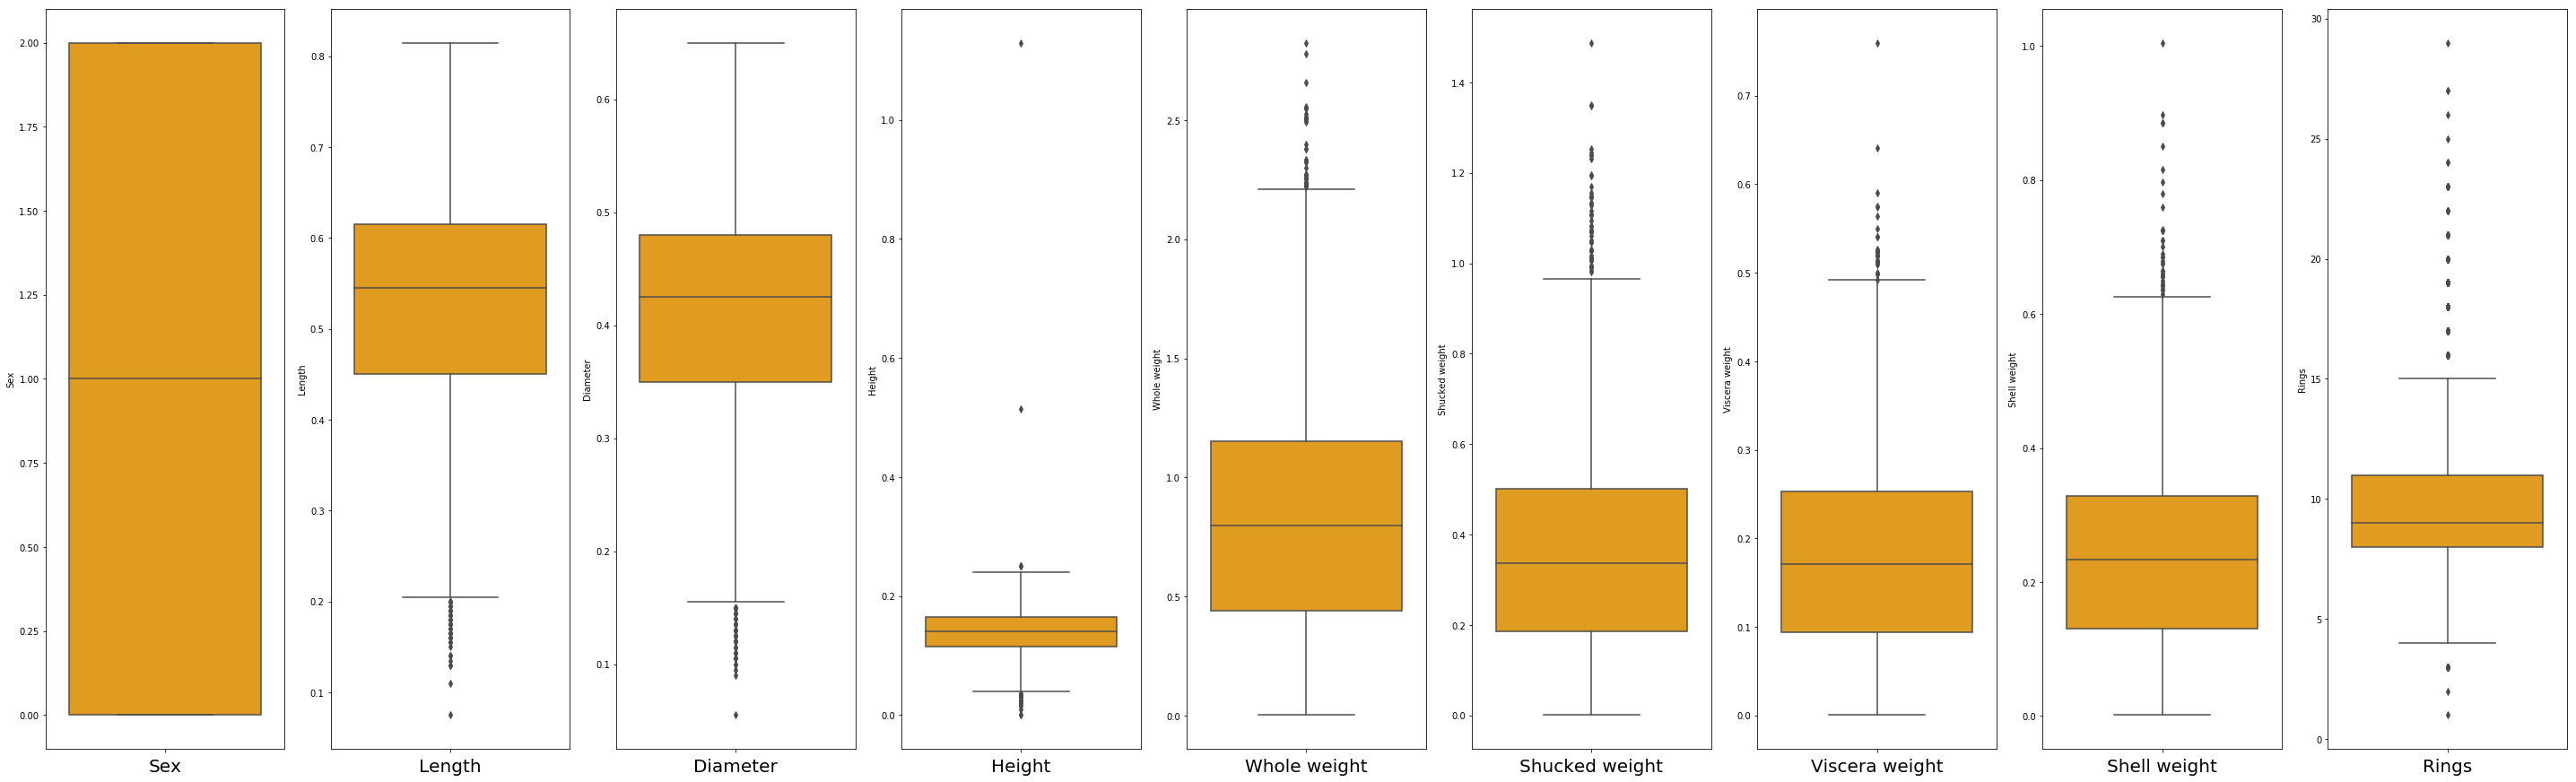

In [18]:
plt.figure(figsize = (40,120))
plot_number  = 1
for i in dataset:
    if plot_number <= 90:
        cd = plt.subplot(10,9,plot_number)
        sns.boxplot(dataset[i],color = 'orange',orient = 'v')
        plt.xlabel(i,fontsize =20)
    plot_number+=1
plt.tight_layout()

#### Upon checking for outliers, I see that all the continuous variables except has outliers. therefore I'm removing the, before I  treat skewness using transformation

### using z-score to eliminate the outliers from the data before that I'm checing for the data loss %

In [19]:
from scipy.stats import zscore
z = np.abs(zscore(dataset))
z.shape

(4177, 9)

In [20]:
loss = 100 -((3956/4177)*100)
loss

5.290878621019871

#### The data loss is minimal and I'm proceeding with outlier removal

In [21]:
ds_new = dataset[(z<2.8).all(axis =1)]
print(dataset.shape)
print(ds_new.shape)

(4177, 9)
(3956, 9)


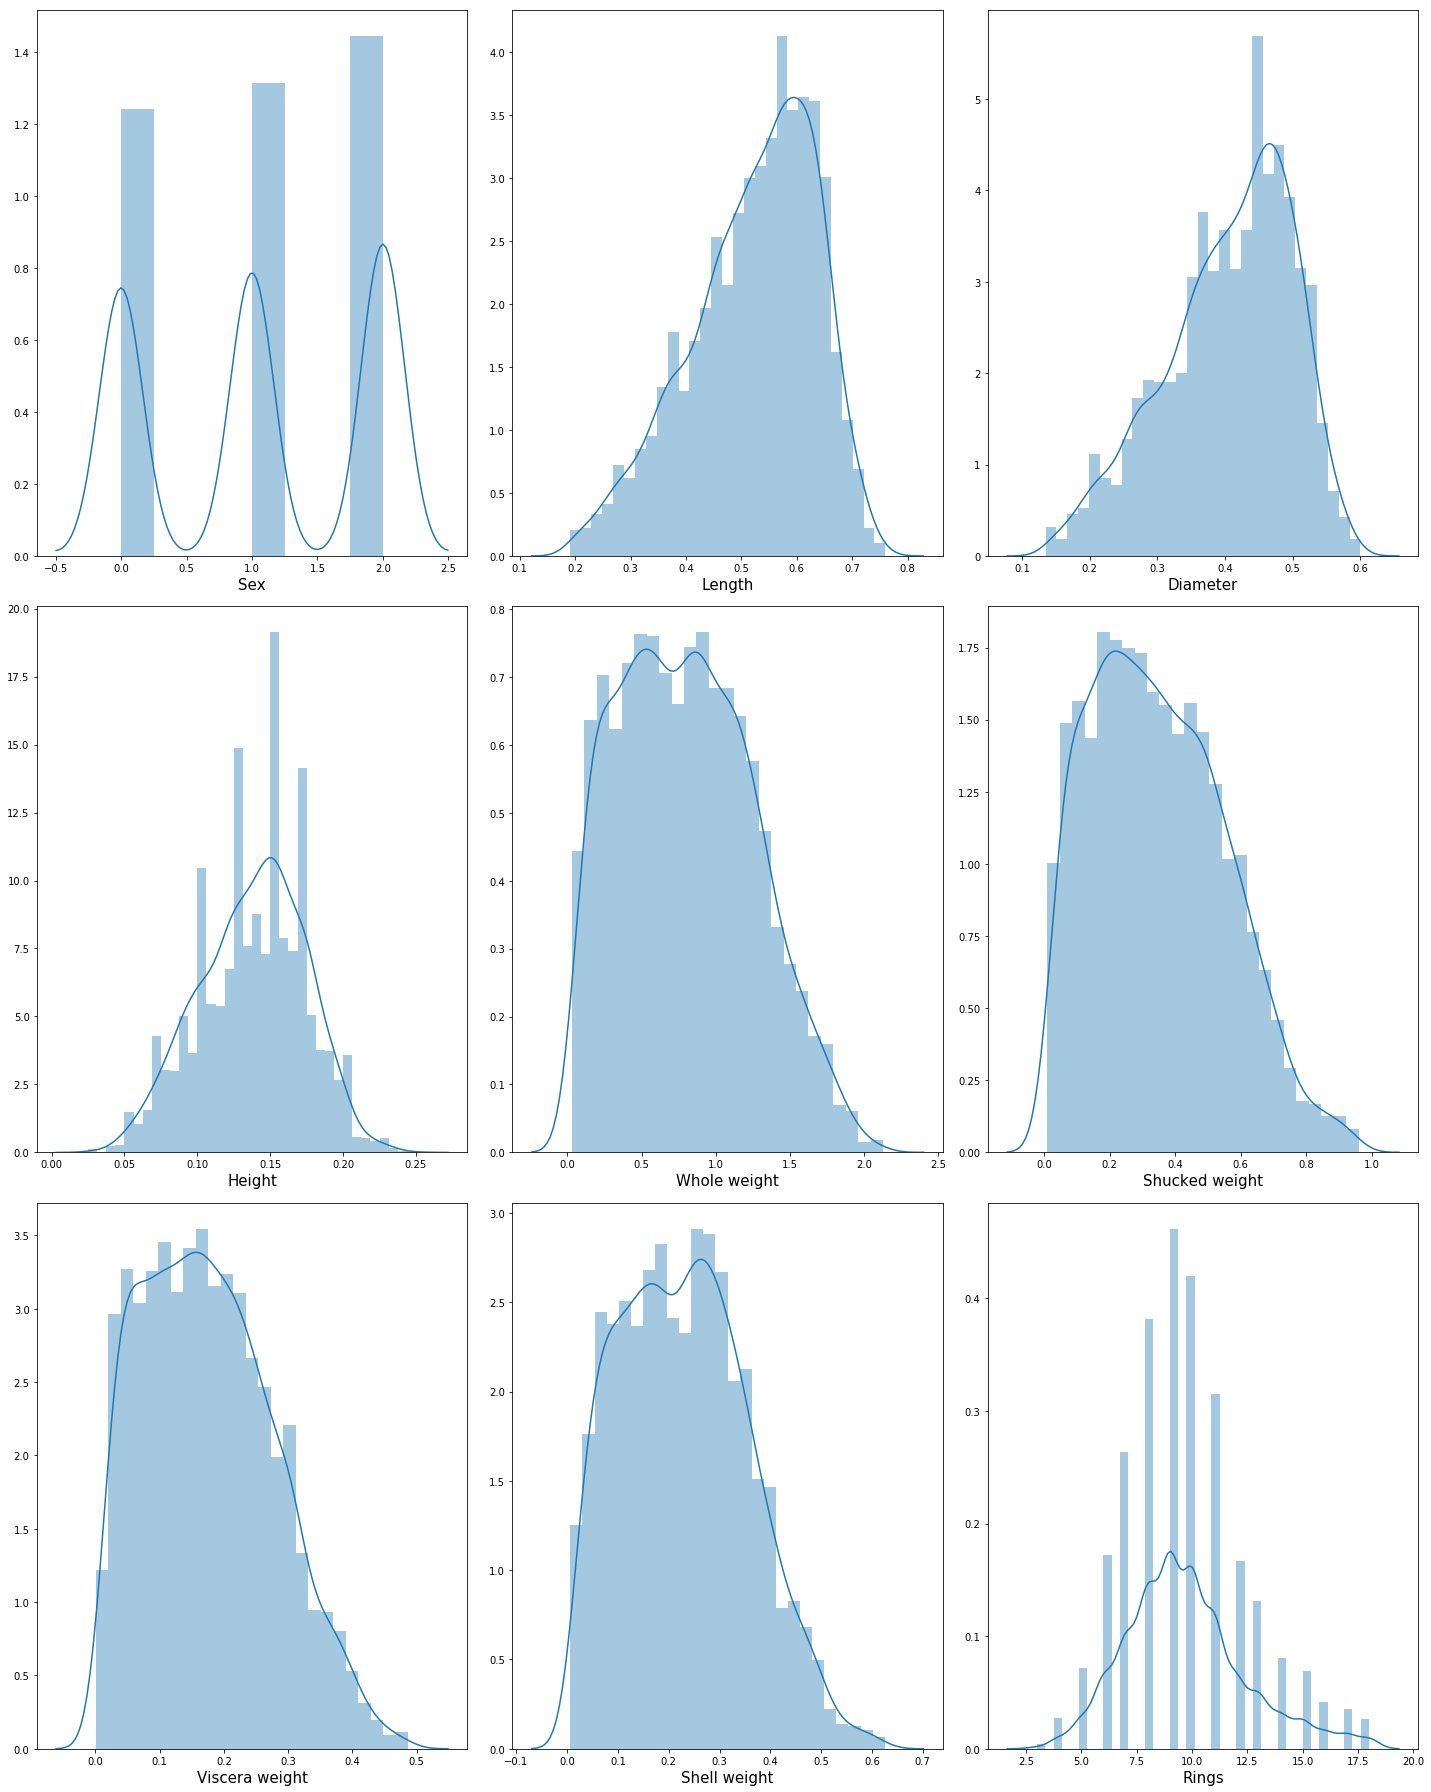

In [22]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for i in ds_new:
    if plotnumber <= 9:
        cx = plt.subplot(3,3,plotnumber)
    if dataset[i].dtype =='object':
        sns.countplot(ds_new[i])
        plt.title(i)
        plt.xticks(rotation = 45)
    else:
        sns.distplot(ds_new[i])
        plt.xlabel(i,fontsize = 15)
    plotnumber+=1
plt.tight_layout()

## Although the outliers are removed, I can still see little skewness in the data variables, hence identifing the actual skewness value and applying transformation technique

In [23]:
ds_new.skew()

Sex              -0.093299
Length           -0.569765
Diameter         -0.551015
Height           -0.205740
Whole weight      0.311008
Shucked weight    0.430207
Viscera weight    0.413979
Shell weight      0.329434
Rings             0.635872
dtype: float64

### The columns 'Length' and 'Diameter' has skewness over the limit (-0.5 to +0.5)

In [24]:
x = ds_new.drop(columns = ['Rings'])
y = ds_new['Rings']

#### I have split the data to apply transformation on all the independent variables

In [25]:
ds_new.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

#### Applying the power transformation using 'yeo-johnson' method due to the presence of negative values

In [26]:
from sklearn.preprocessing import power_transform
tr_data  = power_transform(x, method = 'yeo-johnson')
tr_data  = pd.DataFrame(tr_data, columns = x.columns)

In [27]:
x = tr_data

In [28]:
x.skew()

Sex              -0.173847
Length           -0.082102
Diameter         -0.081066
Height           -0.016027
Whole weight     -0.017989
Shucked weight    0.021501
Viscera weight    0.035592
Shell weight      0.016504
dtype: float64

### The skewness in the data is under control after applying transformation technique

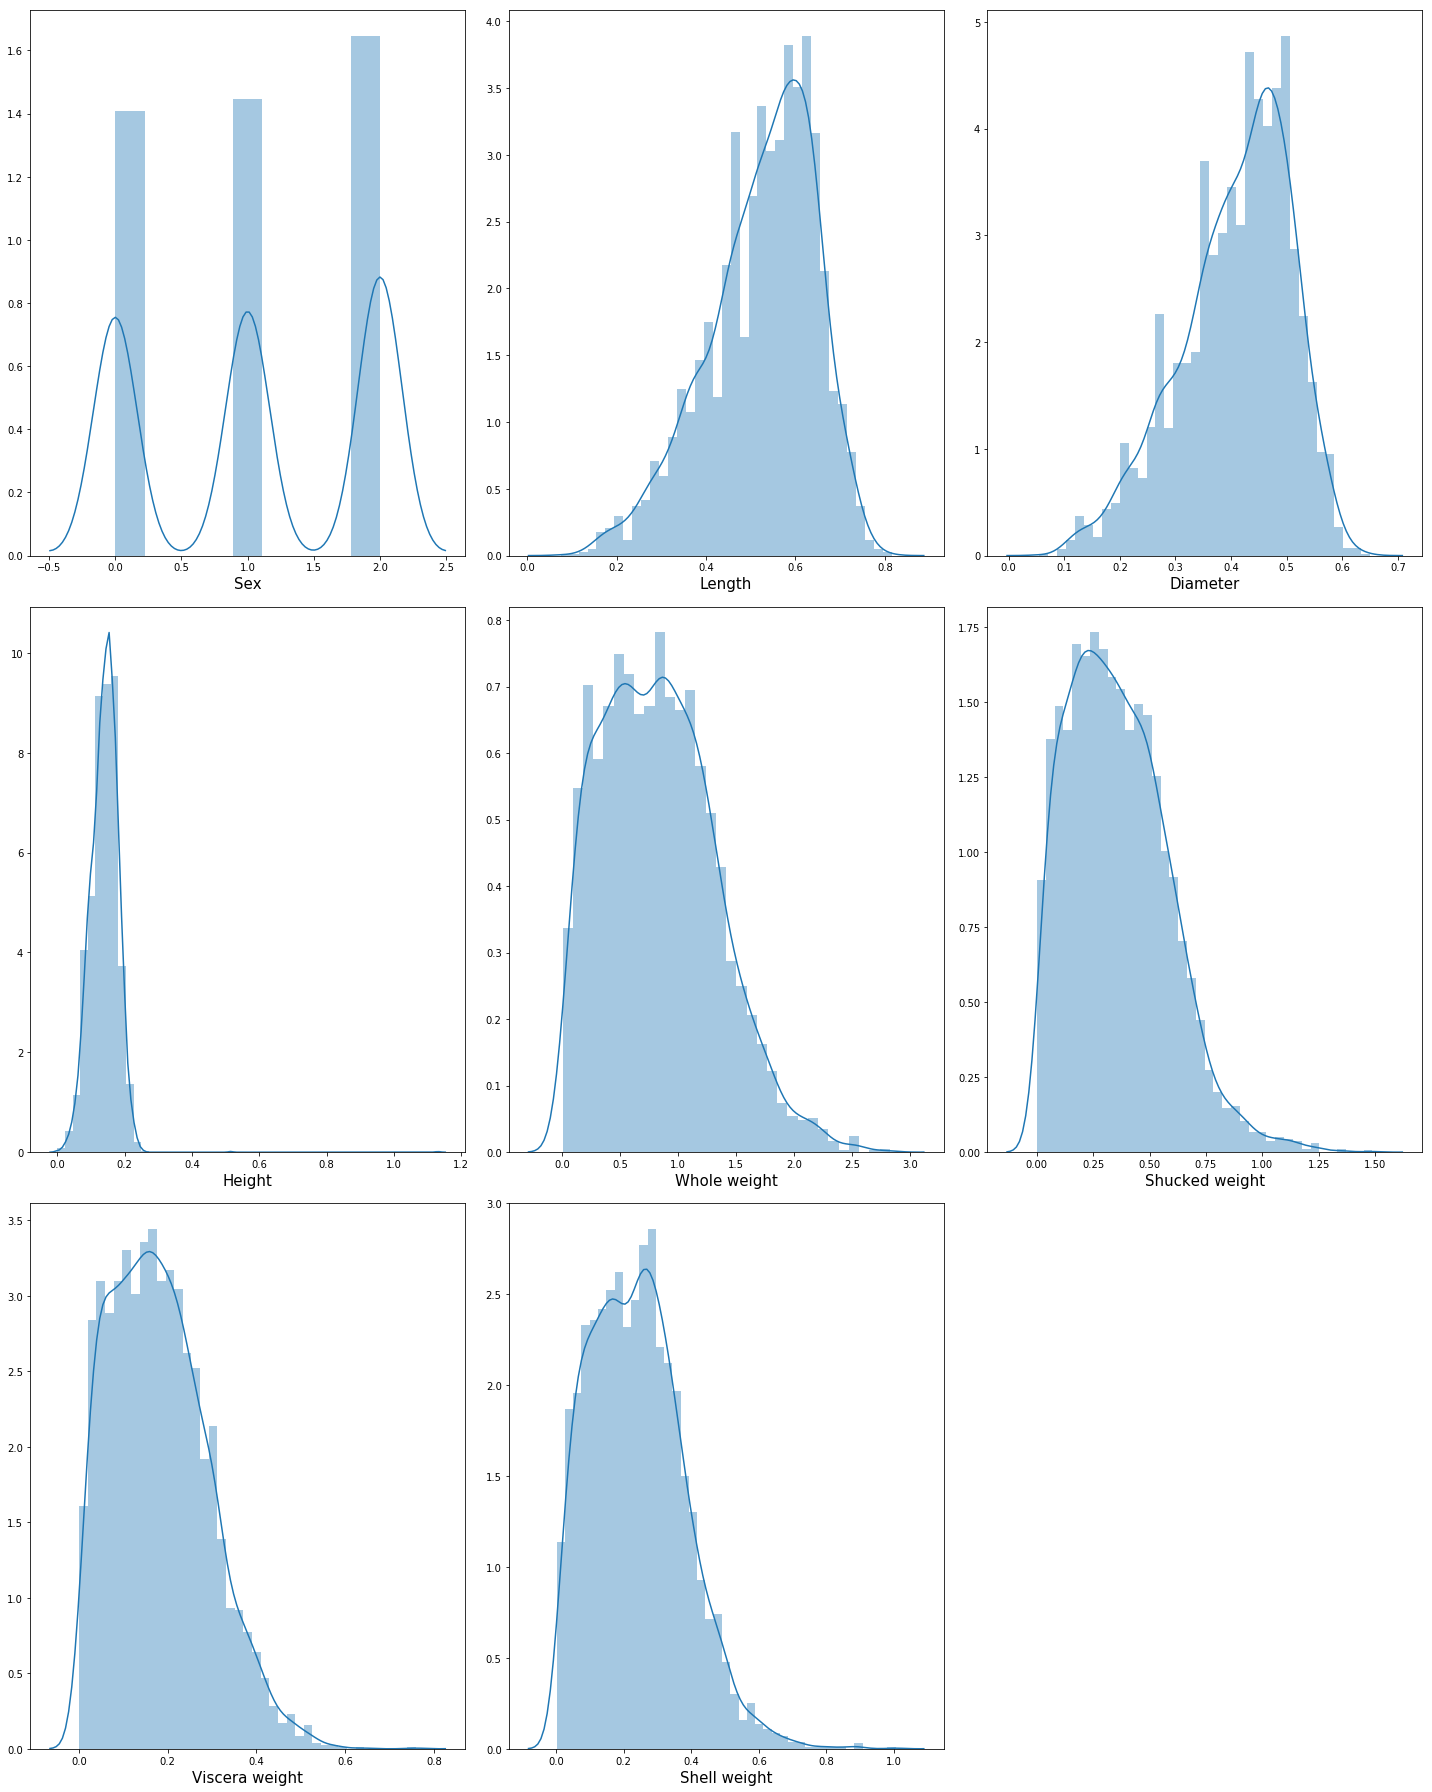

In [29]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for i in x:
    if plotnumber <= 9:
        cx = plt.subplot(3,3,plotnumber)
    if dataset[i].dtype =='object':
        sns.countplot(dataset[i])
        plt.title(i)
        plt.xticks(rotation = 45)
    else:
        sns.distplot(dataset[i])
        plt.xlabel(i,fontsize = 15)
    plotnumber+=1
plt.tight_layout()

## the data looks normally distributed and there are almost no outliers

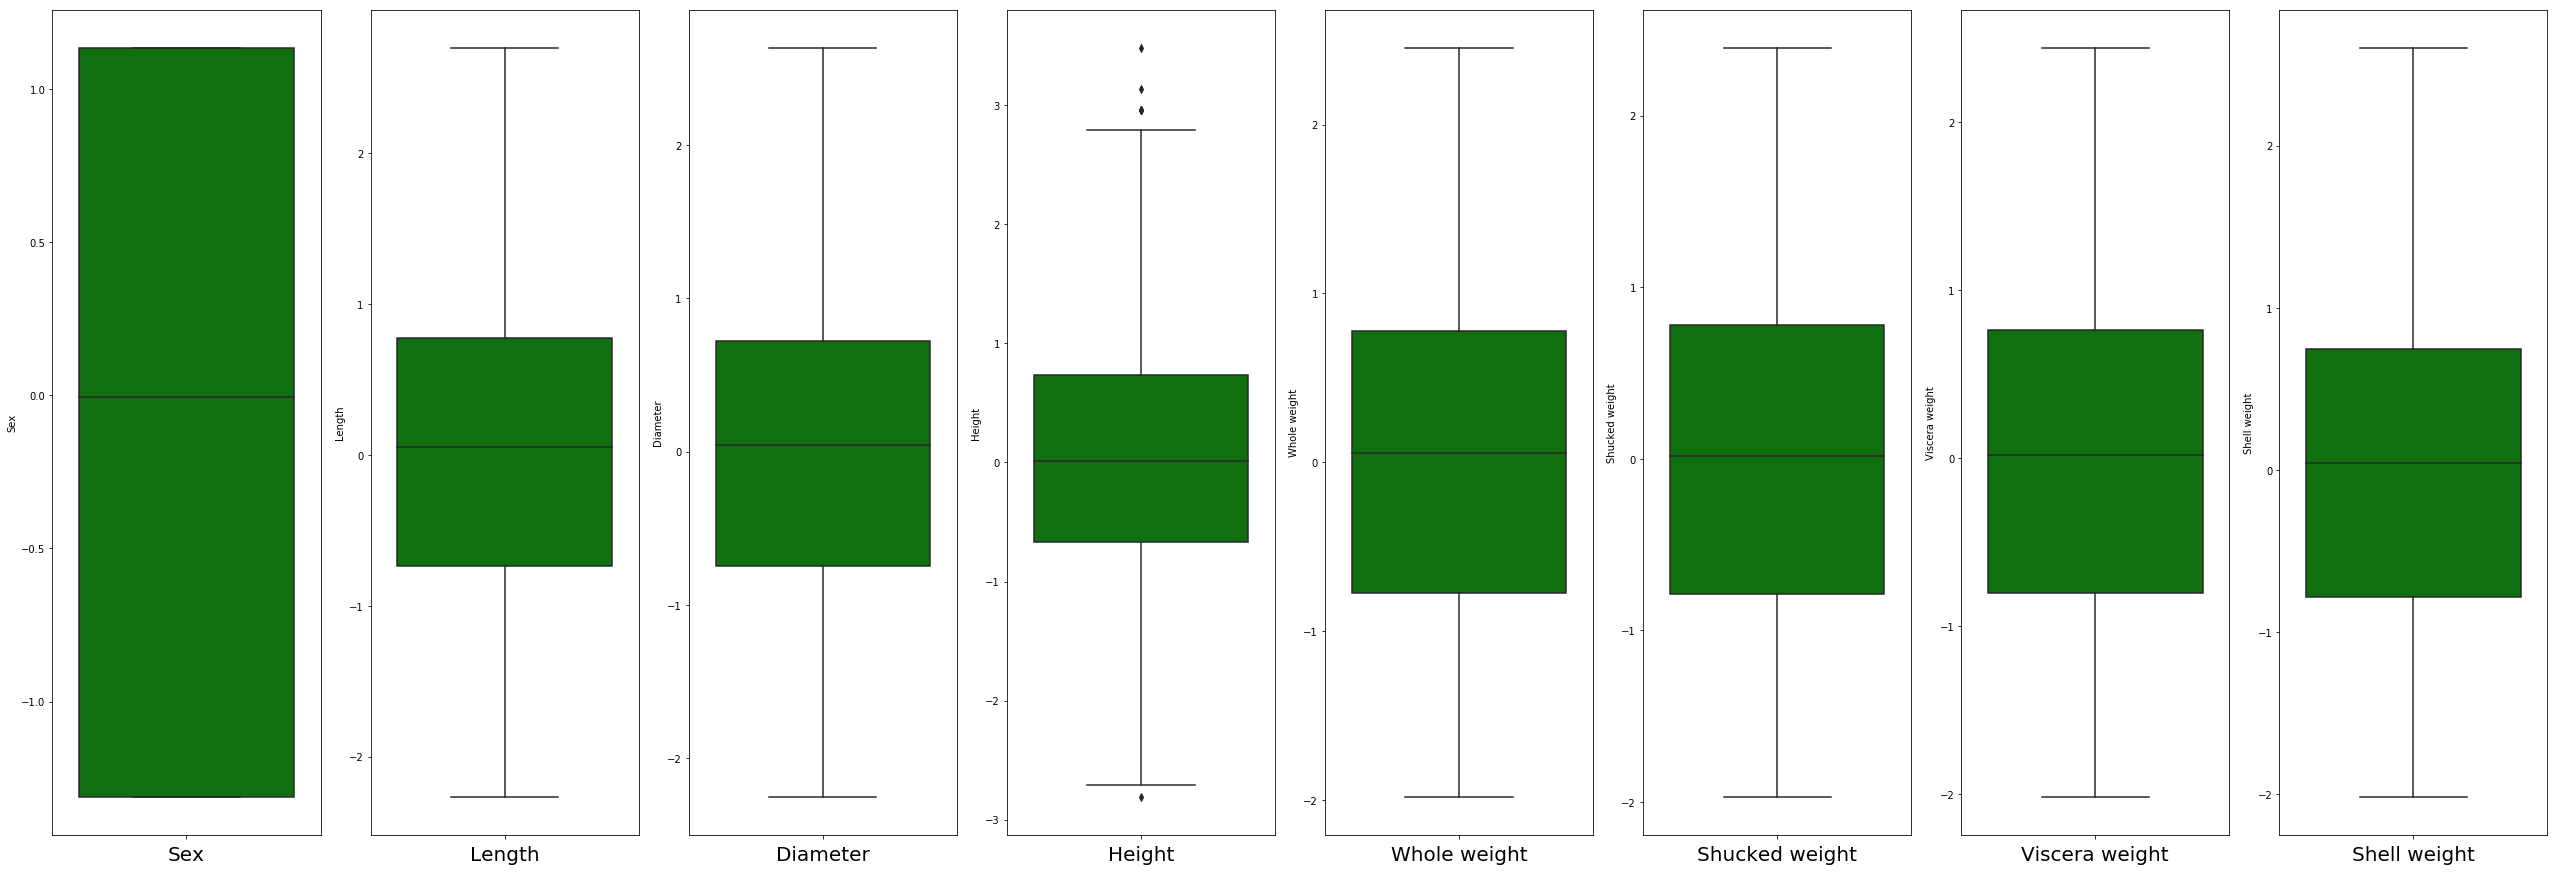

In [30]:
plt.figure(figsize = (40,120))
plot_number  = 1
for i in x:
    if plot_number <= 90:
        cd = plt.subplot(10,9,plot_number)
        sns.boxplot(x[i],color = 'green',orient = 'v')
        plt.xlabel(i,fontsize =20)
    plot_number+=1
plt.tight_layout()

In [31]:
from sklearn.metrics import mean_squared_error

## Imported the necessary metric library and finding the best randomstate (with respect to RMSE) to control over fitting of data

In [32]:
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = i)
    lig = LinearRegression()
    lig.fit(x_train,y_train)
    trn_pred = lig.predict(x_train)
    tst_pred = lig.predict(x_test)
    trn_rmse = np.sqrt(mean_squared_error(y_train,trn_pred))
    tst_rmse = np.sqrt(mean_squared_error(y_test,tst_pred))
    if round(trn_rmse,2)== round(tst_rmse,2):
        brs = i
print('The best random state is',i)

The best random state is 1999


#### Splitting the data with the best random state and the first model i'm using is Linear regression

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = brs)
lig = LinearRegression()
lig.fit(x_train,y_train)
lig_pred = lig.predict(x_test)
lig_score = lig.score(x_test,y_test)
lig_score

0.508961989114808

In [34]:
lig_rmse = np.sqrt(mean_squared_error(y_test,lig_pred))
lig_rmse

1.9199041547210434

#### The r2 score for linear regression is 0.51 (rounded)
### The next algorithm I'm using is Decisoin tree

In [36]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
dt_score = dt.score(x_test,y_test)
dt_score

0.11945085483176798

In [109]:
dt_rmse = np.sqrt(mean_squared_error(y_test,dt_pred))
dt_rmse

2.5709805576474474

#### The r2 score for Decision tree is 0.12 (rounded)
### The next algorithm I'm using is Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor(n_estimators= 100)
rg.fit(x_train,y_train)
rg_pred = rg.predict(x_test)
rg_score = rg.score(x_test,y_test)
rg_score

0.5444965061498117

In [110]:
rg_rmse = np.sqrt(mean_squared_error(y_test,rg_pred))
rg_rmse

1.8491317209204536

#### The r2 score for RandomForest is 0.544 (rounded)
### The next algorithm I'm using is Extra trees

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(n_estimators=100)
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = et.score(x_test,y_test)
et_score

0.5265679486968571

In [111]:
et_rmse = np.sqrt(mean_squared_error(y_test,et_pred))
et_rmse

1.8851713054480177

#### The r2 score for Extra trees is 0.53 (rounded)
### The next algorithm I'm using is Ada Boost

In [45]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
ada_pred = ada.predict(x_test)
ada_score = ada.score(x_test,y_test)
ada_score

0.39654619277620673

In [112]:
ada_rmse = np.sqrt(mean_squared_error(y_test,ada_pred))
ada_rmse

2.1283547074613236

#### The r2 score for Ada Boost is 0.40 (rounded)
### Checking for the cross validation scores

In [46]:
from sklearn.model_selection import cross_val_score

In [50]:
cv1= cross_val_score(lig,x,y,cv = 7, scoring ='r2')
lin_cv = cv1.mean()
lin_cv

0.44237397075041024

In [51]:
cv2 = cross_val_score(dt,x,y,cv =7,scoring = 'r2')
dt_cv = cv2.mean()
dt_cv

-0.03406785203072143

In [53]:
cv3 = cross_val_score(rg,x,y,cv=7, scoring = 'r2')
rg_cv = cv3.mean()
rg_cv

0.46484196107733694

In [54]:
cv4 = cross_val_score(et,x,y,cv =7, scoring ='r2')
et_cv = cv4.mean()
et_cv

0.46024165989030924

In [55]:
cv5 = cross_val_score(ada,x,y,cv = 7, scoring = 'r2')
ada_cv = cv5.mean()
ada_cv

0.23382807971558828

In [62]:
model = pd.DataFrame({})
model_score = [lig_score,dt_score,rg_score,et_score,ada_score]
cv_score = [lin_cv,dt_cv,rg_cv,et_cv,ada_cv]

model['model_score'] = model_score
model['cv_score'] = cv_score
model['best_model'] = model['model_score'] - model['cv_score']
model

,model_score,cv_score,best_model
0,0.508962,0.442374,0.066588
1,0.119451,-0.034068,0.153519
2,0.544497,0.464842,0.079655
3,0.526568,0.460242,0.066326
4,0.396546,0.233828,0.162718


#### based on the lest difference between r2 scores, I have decided ExtraTrees is the best model
### Therefore Proceeding with the final model building phase with hyper parameter tuning.

In [83]:
params =  {'n_estimators':[350,400,500,600,700],
          'max_depth':[15,16,17,19],
          'min_samples_split':[8,10,12,14],
          'max_features':['auto','sqrt','log2'],
          'bootstrap':[True,False]}

In [84]:
grid_search = GridSearchCV(ExtraTreesRegressor(),params,cv = 5)

In [85]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [350, 400, 500, 600, 700], 'max_depth': [15, 16, 17, 19], 'min_samples_split': [8, 10, 12, 14], 'max_features': ['auto', 'sqrt', 'log2'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [88]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 19,
 'max_features': 'auto',
 'min_samples_split': 12,
 'n_estimators': 350}

In [89]:
fnl_mod = ExtraTreesRegressor(bootstrap = True, max_depth = 15, max_features = 'auto',min_samples_split = 8, n_estimators = 100)
fnl_mod.fit(x_train,y_train)
y_pred = fnl_mod.predict(x_test)
y_score  = fnl_mod.score(x_test,y_test)
y_score

0.5485071986553732

In [91]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1.8409729513748105

#### Finally there was no much difference in the scores of the model, Extra Trees and Random Forest is the best suitable model for the dataset and the model is making a lot of error

## Lets try regularization technique with ridge regression

In [92]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [99]:
rcv = RidgeCV(alphas = np.arange(0.00001,1,0.0001), normalize = True, cv =5, gcv_mode = 'auto')
rcv.fit(x_train,y_train)

RidgeCV(alphas=array([1.0000e-05, 1.1000e-04, ..., 9.9981e-01, 9.9991e-01]),
    cv=5, fit_intercept=True, gcv_mode='auto', normalize=True,
    scoring=None, store_cv_values=False)

In [102]:
alpha = rcv.alpha_

In [103]:
ridge = Ridge(alpha)
ridge.fit(x_train,y_train)

Ridge(alpha=0.0006100000000000001, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [104]:
ridge.score(x_test,y_test)

0.5089623692321303

In [105]:
pred_r = ridge.predict(x_test)

In [107]:
rmse1 = np.sqrt(mean_squared_error(y_test,pred_r))
rmse1

1.9199034116126164

### The regression approach isn't working hence considering the problem as multi class

In [32]:
dataset['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

### Upon review, I see that there is a class imbalance. hence using over sampling techniques to fix the issue

(array([  17.,  431., 1648., 1388.,  329.,  228.,  100.,   29.,    4.,
           3.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

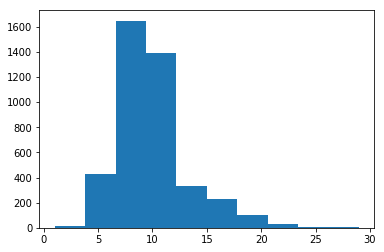

In [33]:
plt.hist(dataset['Rings'])

#### I'm using SMOTE to fix the class imbalance

In [34]:
from imblearn.over_sampling import SMOTE
samp = SMOTE()
x_over, y_over = samp.fit_resample(x,y)

In [35]:
y_over.value_counts()

15    685
7     685
14    685
6     685
13    685
5     685
12    685
4     685
11    685
3     685
18    685
10    685
17    685
9     685
16    685
8     685
Name: Rings, dtype: int64

In [36]:
import warnings
warnings.filterwarnings('ignore')

#### Splitting the data

In [68]:
X_train,X_test, Y_train,Y_test = train_test_split(x_over,y_over, test_size = 0.3, random_state = 42,stratify =y_over)

## model 1 : Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
log = LogisticRegression(solver = 'lbfgs',multi_class='multinomial')
log.fit(X_train,Y_train)

LogisticRegression(multi_class='multinomial')

In [39]:
log_pred = log.predict(X_test)
log_acc = accuracy_score(Y_test,log_pred)
log_acc

0.29531630170316303

## model 2: Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(Y_test,rfc_pred)
rfc_acc

0.7004257907542579

## Model 3: KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(Y_test,knn_pred)
knn_acc

0.6295620437956204

## Model 4: Gradient Boost

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)
gb_pred = gb.predict(X_test)
gb_acc = accuracy_score(Y_test, gb_pred)
gb_acc

0.5225060827250608

## Cross Validation

In [43]:
cv = cross_val_score(log,x_over,y_over,cv = 7)
cv =cv.mean()
cv


0.29735642093249226

In [44]:
cv1 = cross_val_score(rfc,x_over,y_over,cv = 7)
cv1 =cv1.mean()
cv1

0.7397920087575259

In [45]:
cv2 = cross_val_score(knn,x_over,y_over,cv = 7)
cv2 =cv2.mean()
cv2

0.6730008341333669

In [47]:
cv3 = cross_val_score(gb,x_over,y_over,cv =7)
cv3 = cv3.mean()
cv3

0.5442573327667521

In [48]:
mod_sc = [log_acc, rfc_acc,knn_acc,gb_acc]
cv = [cv,cv1,cv2,cv3]
model = pd.DataFrame({})
model['score'] = mod_sc
model['CV'] = cv
model['Diff'] = model['score'] - model['CV']
model

,score,CV,Diff
0,0.295316,0.297356,-0.002040
1,0.700426,0.739792,-0.039366
2,0.629562,0.673001,-0.043439
3,0.522506,0.544257,-0.021751


## Looks like the random forest classifier is performing well over the dataset, as the accuracy score went up to 0.73 in the cross validation of RandomForest Classifier

#### Applying the hyper parameter tuning for the random forest classifier

In [49]:
params = {'n_estimators':[300,450,600,500],
         'criterion':['gini','entropy'],
         'max_depth':[10,13,15,17],
         'min_samples_split':[3,5,7,9],
         }

In [52]:
cvd = GridSearchCV(RandomForestClassifier(),params,cv =5)

In [53]:
cvd.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 13, 15, 17],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [300, 450, 600, 500]})

In [54]:
cvd.best_params_

{'criterion': 'entropy',
 'max_depth': 17,
 'min_samples_split': 3,
 'n_estimators': 600}

In [55]:
fnl_rf = RandomForestClassifier(criterion = 'entropy', max_depth = 17,min_samples_split = 3, n_estimators = 600)

In [56]:
fnl_rf.fit(X_train,Y_train)
fnl_pred = fnl_rf.predict(X_test)
fnl_acc = accuracy_score(Y_test,fnl_pred)
fnl_acc

0.7059002433090025

In [60]:
classif_report = classification_report(Y_test ,fnl_pred)
classif_report

'              precision    recall  f1-score   support\n\n           3       0.96      0.99      0.98       207\n           4       0.88      0.94      0.91       201\n           5       0.84      0.88      0.86       211\n           6       0.67      0.72      0.70       201\n           7       0.59      0.62      0.60       203\n           8       0.39      0.46      0.42       195\n           9       0.32      0.19      0.24       223\n          10       0.35      0.24      0.29       202\n          11       0.55      0.48      0.51       224\n          12       0.68      0.73      0.71       186\n          13       0.71      0.70      0.71       200\n          14       0.73      0.81      0.76       190\n          15       0.80      0.85      0.83       219\n          16       0.86      0.88      0.87       217\n          17       0.80      0.91      0.85       193\n          18       0.85      0.95      0.90       216\n\n    accuracy                           0.71      3288\n   ma

## Saving the model

In [70]:
import joblib
joblib.dump(fnl_rf, 'Abalone.pkl')

['Abalone.pkl']